D:\java\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\java\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


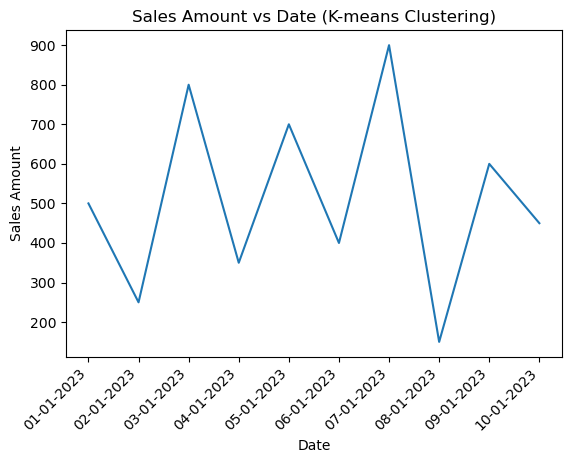

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from sklearn.cluster import KMeans

# load data from CSV
data = pd.read_csv('sales_data.csv')

# preprocess data
X = []
for _, row in data.iterrows():
    date = datetime.strptime(row['date'], '%d-%m-%Y')
    X.append([date.timestamp(), row['amount']])

# perform k-means clustering
kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.predict(X)

# convert timestamp values back to date strings
dates = [datetime.fromtimestamp(x[0]) for x in X]

# create chart
fig, ax = plt.subplots()
ax.plot(dates, [x[1] for x in X])

# format x-axis tick labels as dates
date_format = mdates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate(rotation=45)

# set axis labels and title
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales Amount vs Date (K-means Clustering)')

# show chart
plt.show()
